In [2]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import framenet as fn
import pandas as pd
import seaborn as sns

nltk.download("framenet_v17")

[nltk_data] Downloading package framenet_v17 to
[nltk_data]     /Users/ryanschaefer/nltk_data...
[nltk_data]   Package framenet_v17 is already up-to-date!


True

# Lexical Units

In [3]:
lexical_units = fn.lus()
lu_names = list(set(map(lambda x: x.name, lexical_units)))

print("Total unique lexical units: {}".format(len(lu_names)))

Total unique lexical units: 10462


In [4]:
lu_frames = { key: set() for key in lu_names }
    
for lu in lexical_units:
    lu_frames[lu.name].add(lu.frame.name)
    
multi_frame_units = []
for name, frames in lu_frames.items():
    if len(frames) > 1:
        multi_frame_units.append(name)
    
print("Lexical units with more than 1 frame: {}".format(len(multi_frame_units)))

Lexical units with more than 1 frame: 1987


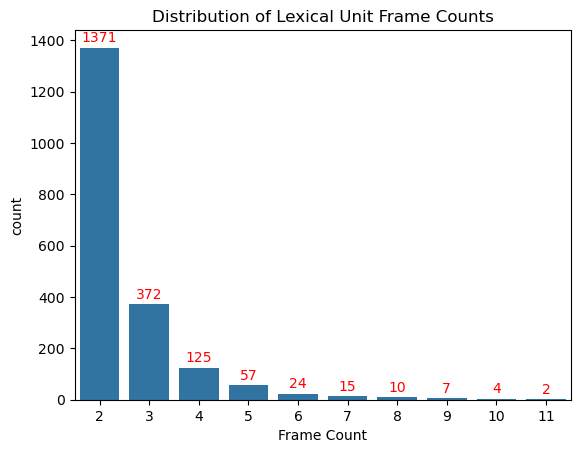

In [5]:
df_lu = pd.DataFrame({
    "Lexical Unit": multi_frame_units,
    "Frame Count": list(map(lambda x: len(lu_frames[x]), multi_frame_units))
})

sns.countplot(df_lu, x = "Frame Count")
plt.title("Distribution of Lexical Unit Frame Counts")

counts = df_lu["Frame Count"].value_counts()
for i, cnt in enumerate(counts):
    plt.annotate(
        str(cnt),
        (i, cnt),
        textcoords = "offset points",
        xytext = (0, 4),
        ha = "center",
        color = "red"
    )

plt.show()

In [6]:
df_lu["Frame"] = list(map(lambda x: list(lu_frames[x]), multi_frame_units))
df_lu = df_lu.explode("Frame", ignore_index = True)

df_lu

,Lexical Unit,Frame Count,Frame
0,fake.v,2,Forging
1,fake.v,2,Feigning
2,question.n,2,Questioning
3,question.n,2,Point_of_dispute
4,lay.v,3,Sex
...,...,...,...
5092,strong.a,6,Chemical_potency
5093,strong.a,6,Level_of_force_resistance
5094,strong.a,6,Judgment_of_intensity
5095,hoot.v,2,Communication_noise


In [12]:
lus = []
frames = []
all_sentences = []

for lu in fn.lus():
    lus.append(lu.name)
    frames.append(lu.frame.name)
    sentences = []
    for sentence in lu.exemplars:
        sentences.append(sentence.text)
    all_sentences.append(sentences)
    
df_lu2 = pd.DataFrame({
    "Lexical Unit": lus,
    "Frame": frames,
    "Sentence": all_sentences
})

df_lu2

,Lexical Unit,Frame,Sentence
0,(can't) help.v,Self_control,"[` Not if I can help it . "", And now she took ..."
1,(in/out of) line.n,Compliance,"[China is not , however , a member of the Aust..."
2,AIDS.n,Medical_conditions,[]
3,AK-47.n,Weapon,[A kalashnikov AK-47 was slung over his should...
4,Alzheimer's.n,Medical_conditions,[]
...,...,...,...
13567,zipper.n,Fastener,"[During the 1992 campaign , when Gennifer Flow..."
13568,zit.n,Body_mark,"[He 's only on antiboyotics as it is , for thi..."
13569,zone.n,Locale,[About 50 per cent of the companies in the zon...
13570,zonk out.v,Fall_asleep,[]


In [8]:
# all_sentences = []

# for i, row in df_lu.iterrows():
#     lexical_unit = row["Lexical Unit"]
#     frame = row["Frame"]
#     sentences = []
#     for lu in fn.lus(lexical_unit, frame):
#         for sentence in lu.exemplars:
#             sentences.append(sentence.text)
#     all_sentences.append(sentences)

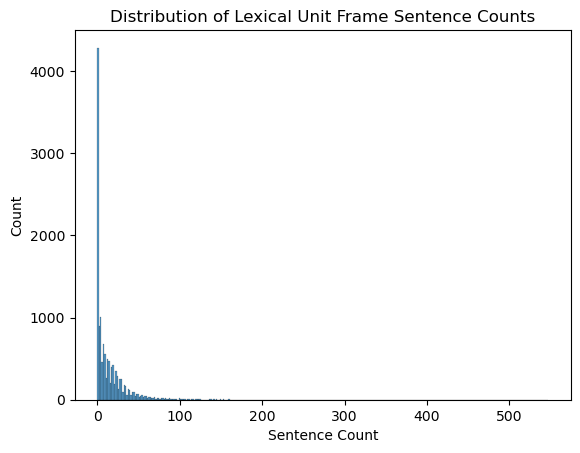

In [13]:
df_lu2["Sentence Count"] = list(map(lambda x: len(x), all_sentences))

sns.histplot(df_lu2, x = "Sentence Count")
plt.title("Distribution of Lexical Unit Frame Sentence Counts")

plt.show()

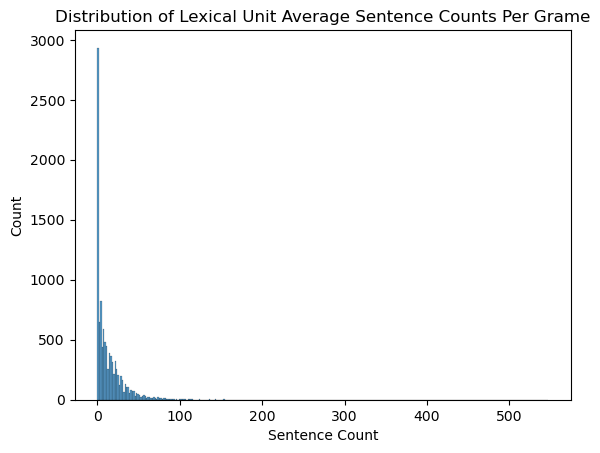

In [14]:
df_lu_grp = df_lu2.groupby("Lexical Unit").mean(numeric_only = True).reset_index()

sns.histplot(df_lu_grp, x = "Sentence Count")
plt.title("Distribution of Lexical Unit Average Sentence Counts Per Grame")

plt.show()

In [15]:
df_lu_grp["Frame Count"] = df_lu_grp["Frame Count"].astype(int)

sns.boxplot(df_lu_grp, x = "Frame Count", y = "Sentence Count")
plt.title("Average Sentences By Frame Count")

plt.show()

KeyError: 'Frame Count'

In [ ]:
df_lu_grp.groupby("Frame Count").describe()

Sentence Count                                              \
                     count       mean        std        min        25%   
Frame Count                                                              
2                   1371.0  16.086069  16.936611   0.000000   4.000000   
3                    372.0  16.858423  14.684247   0.000000   6.666667   
4                    125.0  19.706000  16.181620   0.000000   8.750000   
5                     57.0  19.171930  11.645566   0.400000  10.000000   
6                     24.0  18.312500   8.910222   0.333333  13.041667   
7                     15.0  26.780952  17.793918   8.142857  15.357143   
8                     10.0  19.812500  11.216811   9.500000  13.343750   
9                      7.0  16.000000   6.113468  10.333333  11.944444   
10                     4.0  17.900000   2.198484  15.100000  16.675000   
11                     2.0  18.727273   0.642824  18.272727  18.500000   

                                               
                   50%        75%         max  
Frame Count                                    
2            11.500000  22.000000  140.000000  
3            13.666667  23.333333  121.000000  
4            16.000000  26.750000   97.000000  
5            18.000000  25.200000   52.400000  
6            17.416667  24.666667   33.500000  
7            24.428571  31.000000   77.000000  
8            15.250000  23.875000   46.750000  
9            13.444444  19.277778   25.777778  
10           18.350000  19.575000   19.800000  
11           18.727273  18.954545   19.181818

In [18]:
df_lu2 = df_lu2.explode("Sentence")
df_lu2.to_csv("../datasets/lexical_unit_sentences.csv", index = False)

df_lu2

,Lexical Unit,Frame,Sentence,Sentence Count
0,(can't) help.v,Self_control,"` Not if I can help it . """,11
0,(can't) help.v,Self_control,"And now she took a better look at him , Folly ...",11
0,(can't) help.v,Self_control,"` I could n't help feeling that … well , in yo...",11
0,(can't) help.v,Self_control,"Yet , looking into those liquid dark eyes , Fr...",11
0,(can't) help.v,Self_control,She could n't help the tinge of pink that floo...,11
...,...,...,...,...
13569,zone.n,Locale,Dubai 10-28 ( FP ) - Dubai 's Crown Prince She...,32
13569,zone.n,Locale,A Turbo Cat ferry makes a one - hour trip ( 7 ...,32
13569,zone.n,Locale,"Macau , now the Chinese Special Economic Zone ...",32
13570,zonk out.v,Fall_asleep,NaN,0


# Frame Elements

In [2]:
frame_elements = set()

for frame in fn.frames():
    for elem in frame.FE.values():
        frame_elements.add(elem.name)
        
frame_elements = list(frame_elements)
print("Total unique frame elements: {}".format(len(frame_elements)))

Total unique frame elements: 1285


In [11]:
tmp = []
for sentence in fn.exemplars():
    tmp.append(sentence.ID)

pd.Series.value_counts(tmp)

4097916    27
4102241    25
4100870    22
4100869    22
4100866    22
           ..
728155      1
728156      1
728169      1
728170      1
4127389     1
Name: count, Length: 177571, dtype: int64

In [4]:
fe_sentences = { key: [] for key in frame_elements }

for frame in fn.frames():
    for elem in frame.FE.values():
        for lu in frame.lexUnit.values():
            for sentence in lu.exemplars:
                for annotation_set in sentence.annotationSet:
                    if annotation_set.layer:
                        for layer in annotation_set.layer:
                            if layer.name == "FE":
                                for x in layer.label:
                                    if x.name == elem.name:
                                        fe_sentences[elem.name].append(sentence.text)
                                        break
                                break

frame (2031): Abandonment

[URL] https://framenet2.icsi.berkeley.edu/fnReports/data/frame/Abandonment.xml

[definition]
  An Agent leaves behind a Theme effectively rendering it no longer
  within their control or of the normal security as one's property.
  'Carolyn abandoned her car and jumped on a red double decker
  bus.'  'Perhaps he left the key in the ignition'  'Abandonment of
  a child is considered to be a serious crime in many
  jurisdictions.'  There are also metaphorically used examples:
  'She left her old ways behind .'

[semTypes] 0 semantic types

[frameRelations] 1 frame relations
  <Parent=Intentionally_affect -- Inheritance -> Child=Abandonment>

[lexUnit] 5 lexical units
  abandon.v (14839), abandoned.a (14843), abandonment.n (14842),
  forget.v (15317), leave.v (14841)


[FE] 12 frame elements
            Core: Agent (12338), Theme (12339)
      Peripheral: Degree (14482), Duration (12343), Manner (12342), Means (15920), Place (12340), Purpose (15921), Time (12341)

Exception: 

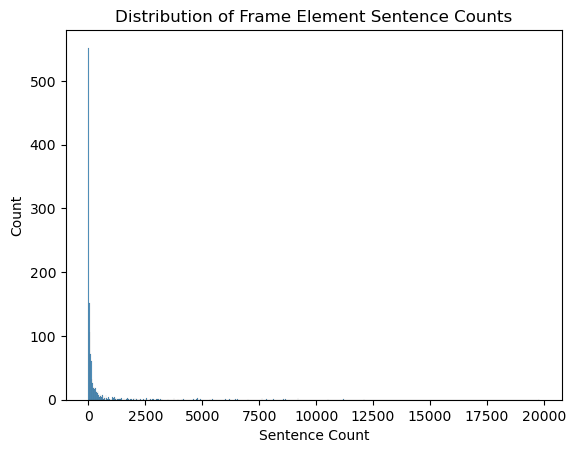

In [15]:
df_fe = pd.DataFrame({
    "Frame Element": list(frame_elements),
    "Sentence Count": list(map(lambda x: len(fe_sentences[x]), frame_elements))
})

sns.histplot(df_fe, x = "Sentence Count")
plt.title("Distribution of Frame Element Sentence Counts")

plt.show()

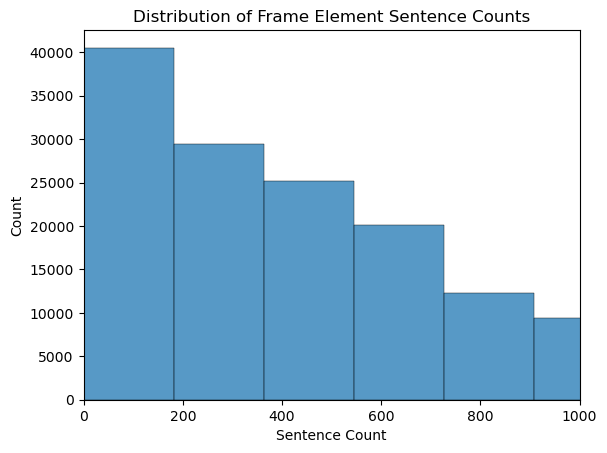

In [17]:
sns.histplot(df_fe, x = "Sentence Count")
plt.title("Distribution of Frame Element Sentence Counts")
plt.xlim(0, 1000)

plt.show()

In [16]:
df_fe["Sentence"] = list(map(lambda x: list(fe_sentences[x]), frame_elements))
df_fe = df_fe.explode("Sentence")
df_fe.to_csv("../datasets/frame_element_sentences.csv", index = False)

df_fe

,Frame Element,Sentence Count,Sentence
0,Speaker,11189,"In its evidence in chief , the prosecution nee..."
0,Speaker,11189,If the parties wish to adduce evidence in supp...
0,Speaker,11189,TNC adduces arguments for a broad and balanced...
0,Speaker,11189,The respondent may also adduce argument .
0,Speaker,11189,( This appears to be the only independent supp...
...,...,...,...
1284,Initial_correlate,34,"But the economic boom , coupled with rising in..."
1284,Initial_correlate,34,The government 's opinion-poll rating has edge...
1284,Initial_correlate,34,Changing weather conditions also helped firefi...
1284,Initial_correlate,34,"Since the early 1970s , however , catches have..."
